import lib---

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

load data ---

In [81]:
df = pd.read_csv('../data/heartDP.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [84]:
# Look for missing values

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [85]:
# drop irrelavent columns

df.drop('education',inplace=True,axis=1)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [86]:
# Treat Missing Values

for i in df.columns:
    df[i] = df[i].fillna(df[i].median())

df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [87]:
# Look into the target var -

df.TenYearCHD.value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

the data is highly baised to tenyearchd - 0

In [88]:
# Now i have to standadised all the columes

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [89]:
x.shape,y.shape

((4240, 14), (4240,))

In [90]:
type(x)

pandas.core.frame.DataFrame

<Axes: >

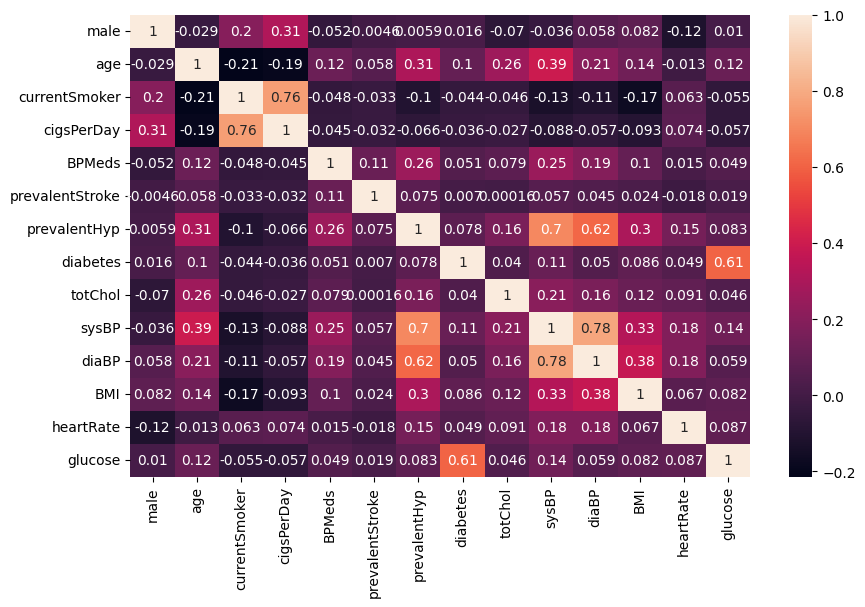

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(),annot=True)

In [92]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 1.15311332, -1.23428297, -0.98827627, ...,  0.28769301,
         0.34279225, -0.20128686],
       [-0.86721746, -0.41766419, -0.98827627, ...,  0.72009414,
         1.59045091, -0.2450359 ],
       [ 1.15311332, -0.18434454,  1.01186281, ..., -0.11276941,
        -0.07309396, -0.50753015],
       ...,
       [-0.86721746,  0.28229477, -0.98827627, ..., -1.06356055,
         0.34279225,  1.11118437],
       [ 1.15311332, -1.11762315, -0.98827627, ..., -0.04889197,
        -0.73851192, -0.42003207],
       [-0.86721746, -1.23428297,  1.01186281, ..., -1.20114273,
         0.75867847, -0.07003974]], shape=(4240, 14))

In [93]:
x_scaler_df = pd.DataFrame(x_scaler,columns=x.columns)
x_scaler_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.153113,-1.234283,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,-0.940086,-1.196267,-1.083027,0.287693,0.342792,-0.201287
1,-0.867217,-0.417664,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,0.300797,-0.515399,-0.159355,0.720094,1.590451,-0.245036
2,1.153113,-0.184345,1.011863,0.928784,-0.173569,-0.077014,-0.671241,-0.162437,0.187990,-0.220356,-0.243325,-0.112769,-0.073094,-0.507530
3,-0.867217,1.332233,1.011863,1.768882,-0.173569,-0.077014,1.489778,-0.162437,-0.263241,0.800946,1.016227,0.683242,-0.904866,0.936188
4,-0.867217,-0.417664,1.011863,1.180813,-0.173569,-0.077014,-0.671241,-0.162437,1.090450,-0.106878,0.092555,-0.663098,0.758678,0.148705


/var/folders/n6/28ff8fsj0c901jvkhvfb8ylw0000gn/T/ipykernel_1884/1804690168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=df,


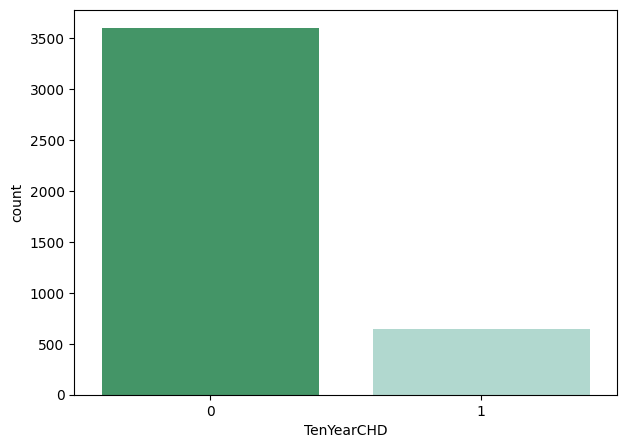

In [94]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df,
             palette="BuGn_r")
plt.show()

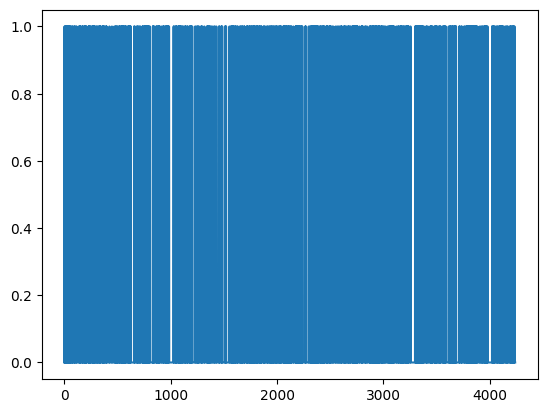

In [95]:
laste = df['TenYearCHD'].plot()
plt.show(laste)

In [96]:
# Let split the data into train and test

x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3392, 14), (848, 14), (3392,), (848,))

In [97]:
lr_model = LogisticRegression() # lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(x_train,y_train)
y_predict = lr_model.predict(x_test)
y_predict[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [98]:
acc = accuracy_score(y_predict,y_test)
acc

0.8561320754716981

<Axes: >

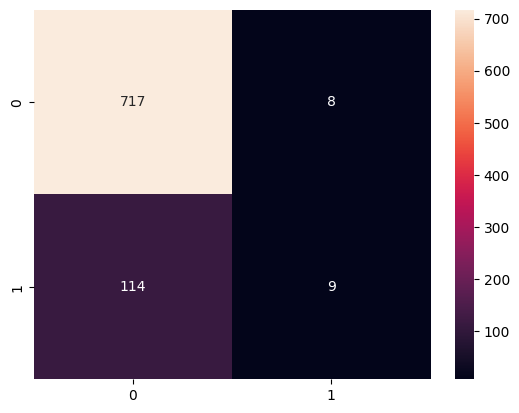

In [99]:
cf = confusion_matrix(y_test,y_predict)
sns.heatmap(cf,annot=True,fmt = 'd')

In [100]:
print('The details for confusion matrix is =')
print (classification_report(y_test, y_predict))

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.53      0.07      0.13       123

    accuracy                           0.86       848
   macro avg       0.70      0.53      0.53       848
weighted avg       0.81      0.86      0.81       848



<Axes: title={'center': 'Feature Importance (LogReg)'}>

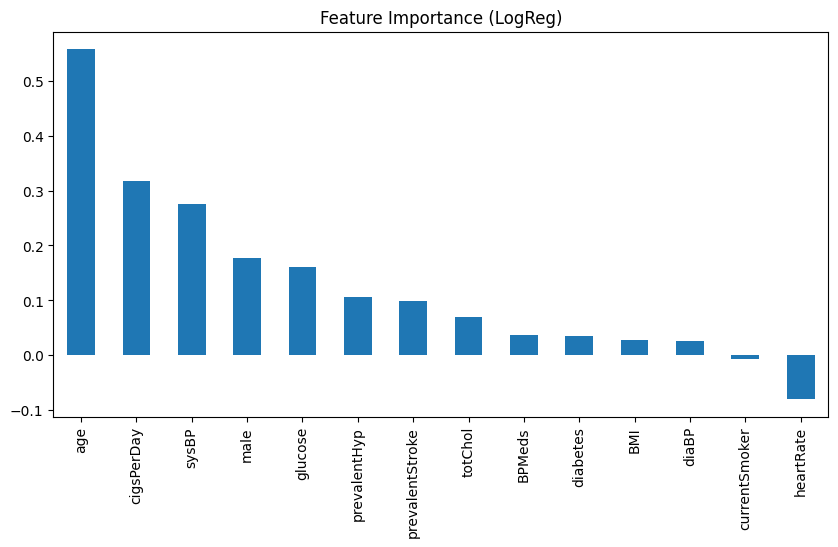

In [101]:
importance = pd.Series(lr_model.coef_[0], index=x.columns)
importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance (LogReg)', figsize=(10, 5))

In [102]:
x_scaler_df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [103]:
# Now lets take best 5 
x = x_scaler_df[['age','cigsPerDay','sysBP','male','glucose','heartRate']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3392, 6), (848, 6), (3392,), (848,))

In [104]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
y_predict = lr_model.predict(x_test)
y_predict[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Axes: >

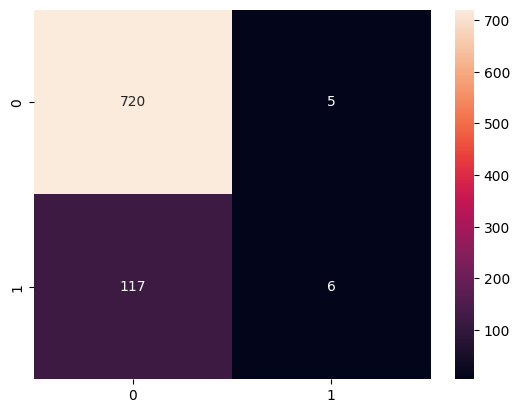

In [105]:
cf = confusion_matrix(y_test,y_predict)
sns.heatmap(cf,annot=True,fmt = 'd')

In [106]:
print('The details for confusion matrix is =')
print (classification_report(y_test, y_predict))

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.55      0.05      0.09       123

    accuracy                           0.86       848
   macro avg       0.70      0.52      0.51       848
weighted avg       0.81      0.86      0.80       848



In [107]:
X = np.asarray(df[['age', 'male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(df['TenYearCHD'])

X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2968, 6) (2968,)
Test set: (1272, 6) (1272,)


In [108]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [109]:
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8569182389937107


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1084
           1       0.69      0.06      0.11       188

    accuracy                           0.86      1272
   macro avg       0.77      0.53      0.52      1272
weighted avg       0.83      0.86      0.80      1272



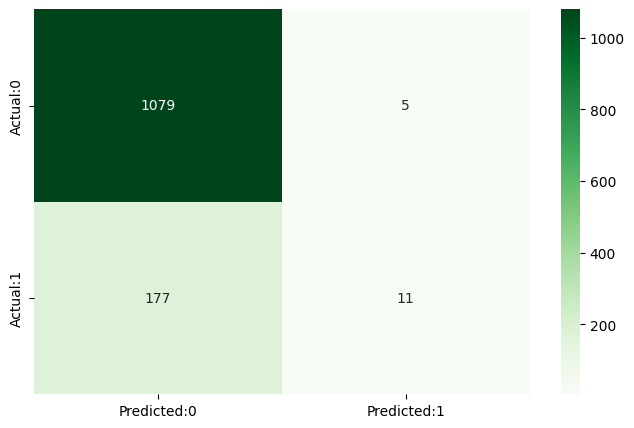

In [110]:
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()